### Importing Necessary Libraries ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Loading Fake News's Datsets ###

In [2]:
fake_data = pd.read_csv("Fake.csv")
true_data = pd.read_csv("True.csv")

In [3]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_data["label"] = 0
true_data["label"] = 1

In [6]:
fake_data.shape, true_data.shape

((23481, 5), (21417, 5))

In [7]:
merge_data = pd.concat([fake_data,true_data],axis = 0, ignore_index=True)
merge_data.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [8]:
merge_data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [9]:
df = merge_data.drop(['title','subject','date'],axis = 1)
df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [10]:
df.isnull().sum()

text     0
label    0
dtype: int64

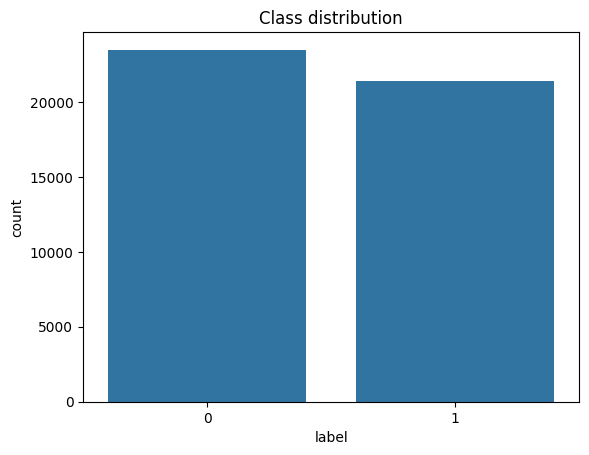

In [11]:
sns.countplot(x="label", data=df)
plt.title("Class distribution")
plt.show()

In [12]:
fake_wc = WordCloud(max_words=200, background_color='white').generate(" ".join(fake_data['text']))
true_wc = WordCloud(max_words=200, background_color='white').generate(" ".join(true_data['text']))

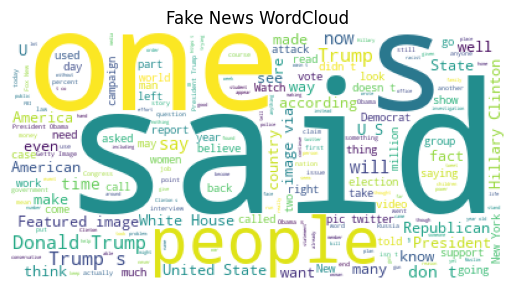

In [13]:
plt.imshow(fake_wc)
plt.axis("off")
plt.title("Fake News WordCloud")
plt.show()

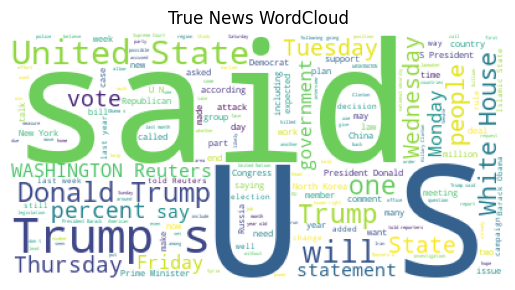

In [14]:
plt.imshow(true_wc)
plt.axis("off")
plt.title("True News WordCloud")
plt.show()

### Text Preprocessing ###

In [15]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [16]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

In [17]:
df["text"] = df["text"].apply(preprocess_text)

### Train-Test Split ###

In [18]:
X = df["text"]
y = df["label"]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

### ML Modelling ###

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
xv_train = vectorizer.fit_transform(X_train)
xv_test = vectorizer.transform(X_test)

In [21]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [22]:
y_lr_pred = lr.predict(xv_test)

In [23]:
lr.score(xv_test,y_test)

0.9857461024498887

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5895
           1       0.98      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



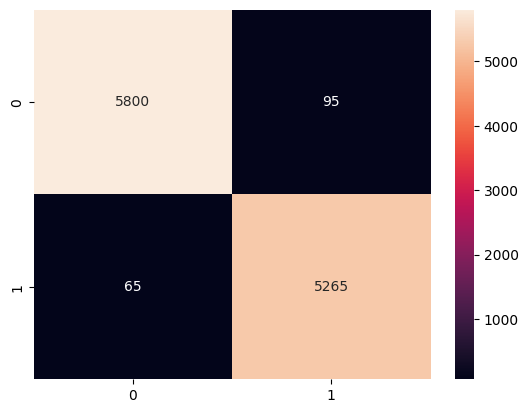

In [25]:
print(classification_report(y_test, y_lr_pred))
sns.heatmap(confusion_matrix(y_test, y_lr_pred), annot=True, fmt="d")
plt.show()

In [26]:
# MultinomialNB
nb = MultinomialNB()
nb.fit(xv_train,y_train)
y_nb_pred = nb.predict(xv_test)

In [27]:
nb.score(xv_test,y_test)

0.9277505567928731

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5895
           1       0.93      0.92      0.92      5330

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225



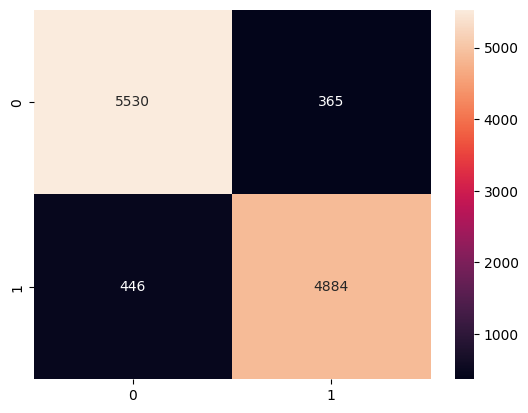

In [28]:
print(classification_report(y_test, y_nb_pred))
sns.heatmap(confusion_matrix(y_test, y_nb_pred), annot=True, fmt="d")
plt.show()

In [29]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xv_train, y_train)
y_rf_pred = lr.predict(xv_test)

In [30]:
rf.score(xv_test,y_test)

0.9971492204899778

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5895
           1       0.98      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



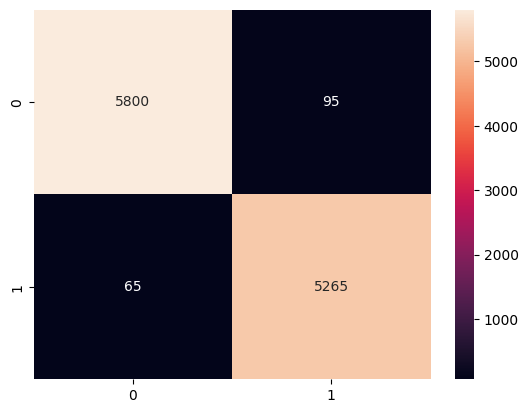

In [31]:
print(classification_report(y_test, y_rf_pred))
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, fmt="d")
plt.show()

### GLoV & LSTM ###

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [36]:
max_words = 10000
max_len = 200

In [37]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
X_train_seq = tok.texts_to_sequences(X_train)
X_test_seq = tok.texts_to_sequences(X_test)

In [38]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [39]:
model = Sequential([
    Embedding(max_words, 128),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, validation_split=0.2, epochs=3, batch_size=64)

Epoch 1/3
421/421 ━━━━━━━━━━━━━━━━━━━━ 178s 405ms/step - accuracy: 0.9467 - loss: 0.1379 - val_accuracy: 0.9785 - val_loss: 0.0676
Epoch 2/3
421/421 ━━━━━━━━━━━━━━━━━━━━ 173s 411ms/step - accuracy: 0.9777 - loss: 0.0637 - val_accuracy: 0.9783 - val_loss: 0.0648
Epoch 3/3
421/421 ━━━━━━━━━━━━━━━━━━━━ 185s 371ms/step - accuracy: 0.9878 - loss: 0.0406 - val_accuracy: 0.9825 - val_loss: 0.0570


### Comparison ### 

In [41]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [lr.score(xv_test,y_test), nb.score(xv_test,y_test), rf.score(xv_test,y_test)]
})

In [42]:
results.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.997149
0,Logistic Regression,0.985746
1,Naive Bayes,0.927751


In [52]:
import joblib
joblib.dump(lr, "fake_news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("Model saved!")

Model saved!
